<a href="https://colab.research.google.com/github/jelaenas/APM1111/blob/main/CESISTA%2CKJ_LAB_FA3_GROUP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
library(tidyverse)

# **Part 1: Exploratory Data Analysis**

1. (2 pts) Using the mpg dataset, identify the response variable and explanatory variable.

The response variable is hwy (highway miles per gallon) as it is the variable we try to predict.  The explanatory variable is displ (engine displacement in liters) as it is the variable used to predict hwy.

2. (4 pts) Create the following visualizations using the mpg dataset:

A scatterplot of hwy vs displ

One additional plot (histogram or boxplot) for either hwy or displ

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


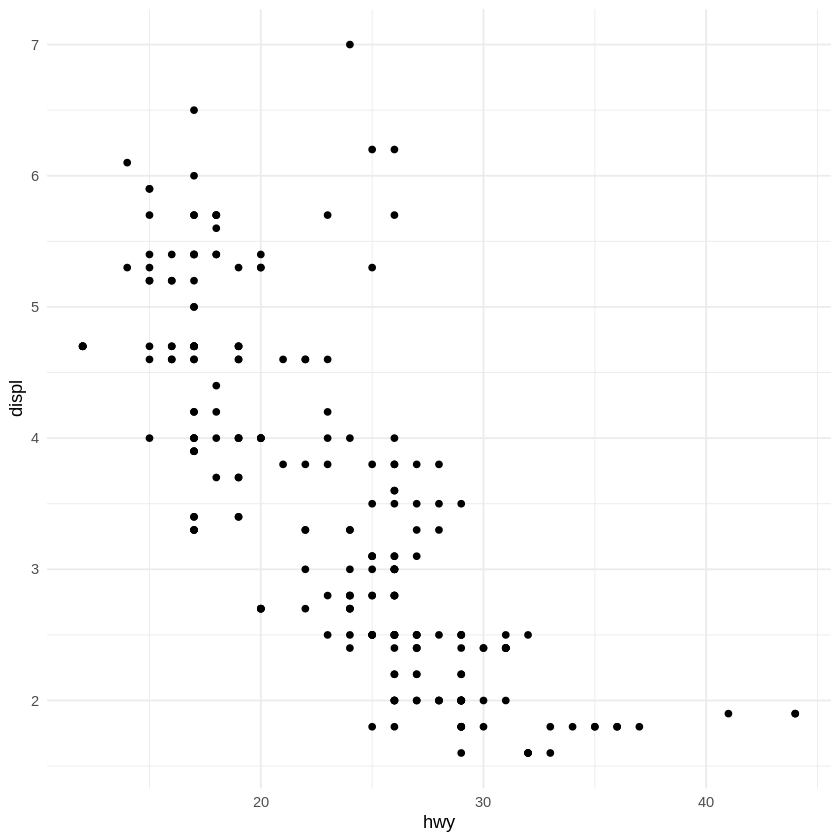

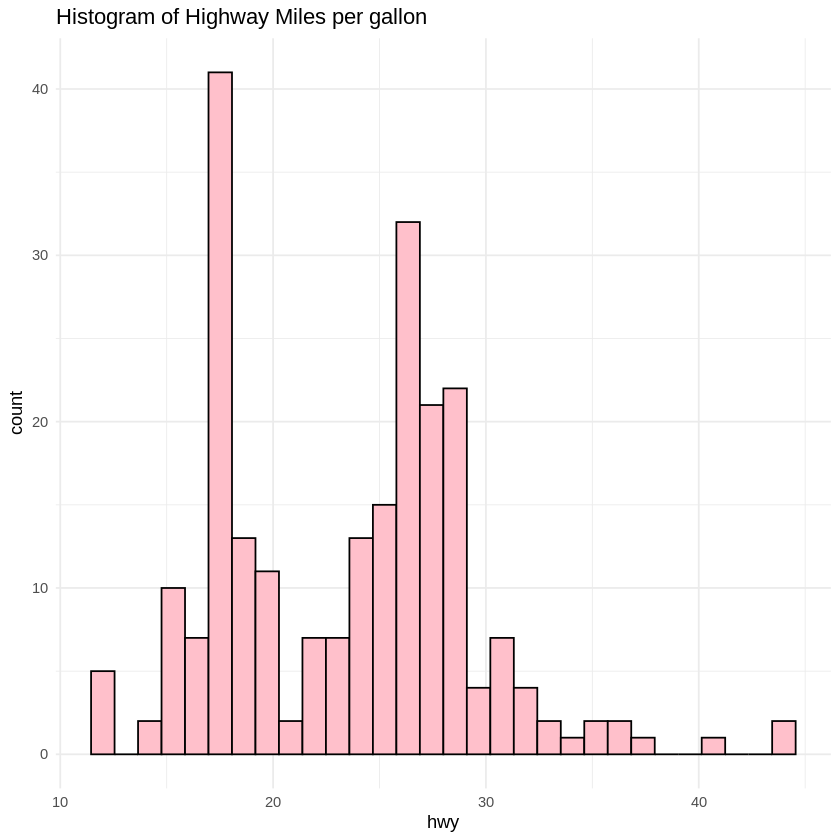

In [37]:
data("mpg")

# Create the following visualizations using the mpg dataset:
# A scatterplot of hwy vs displ
ggplot(data = mpg, aes(x = hwy, y = displ)) +
  geom_point() +
  theme_minimal()

# One additional plot (histogram or boxplot) for either hwy or displ
ggplot(mpg, aes(x=hwy)) +
  geom_histogram(fill = "pink", color = "black")  +
  labs(
    title = "Histogram of Highway Miles per gallon",
    x = "hwy",
    y = "count"
  ) +
  theme_minimal()

# **Part 2: Building a Simple Linear Model**
(3 pts) Fit a simple linear regression model using the mpg dataset with:

hwy as the response variable

displ as the explanatory variable

(5 pts) Write the fitted model equation and interpret:

The slope in terms of engine displacement and highway MPG

The intercept in context of the data


Call:
lm(formula = hwy ~ displ, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1039 -2.1646 -0.2242  2.0589 15.0105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.6977     0.7204   49.55   <2e-16 ***
displ        -3.5306     0.1945  -18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.836 on 232 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.585 
F-statistic: 329.5 on 1 and 232 DF,  p-value: < 2.2e-16



The fitted model equation is: hwy = 35.698 + -3.531x

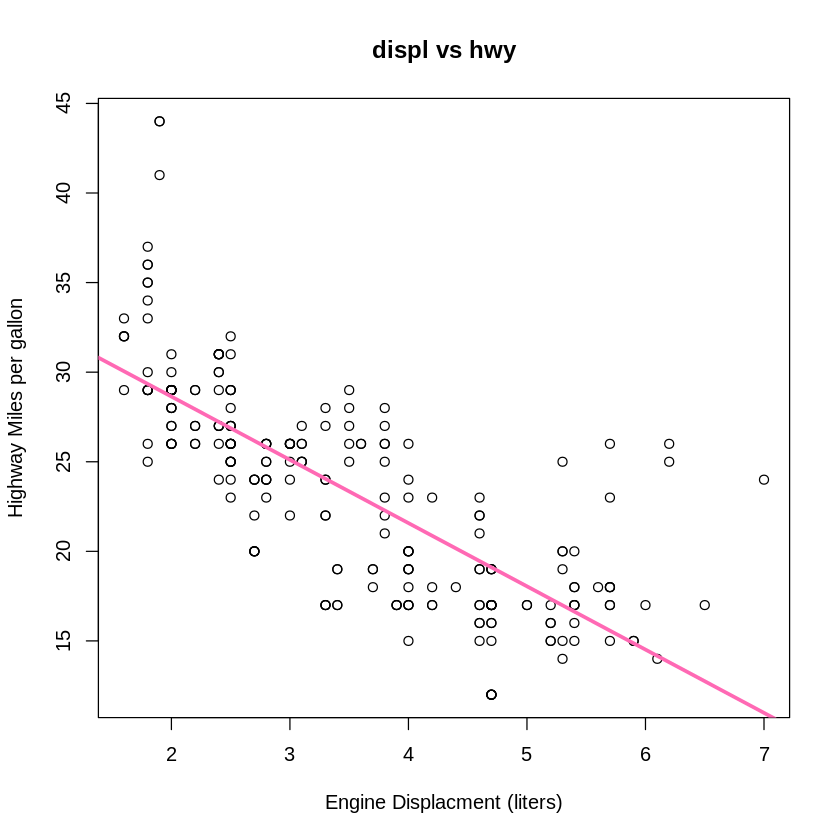

In [36]:
# Fit a simple linear regression model using the mpg dataset with: hwy as the response variable, and displ as the explanatory variable

plot(hwy ~ displ, data = mpg,
     main = "displ vs hwy",
     xlab = "Engine Displacment (liters)",
     ylab = "Highway Miles per gallon")

model <- lm(hwy ~ displ, data = mpg)
abline(model, col = "hot pink", lwd = 3)

#Write the fitted model equation and interpret: The slope in terms of engine displacement and highway MPG and the intercept in context of the data.

summary(model)

coefficients <- coef(model)
intercept <- coefficients["(Intercept)"]
slope <- coefficients["displ"]

cat(sprintf("\nThe fitted model equation is: hwy = %0.3f + %0.3fx", intercept, slope))

The fitted model equation is: hwy = 35.698 + -3.531x.

The slope in terms of engine displacement and highway MPG
- The slope (-3.531) is how much the highway MPG decreases/increases for every liter of engine displacement.

The intercept in context of the data
- In the context of the data, the intercept is the highway MPG when the engine displament is zero liters.

# **Part 3: Model Assumptions and Diagnostics**

(5 pts) Using your fitted mpg linear model, assess the following assumptions using diagnostic plots:

Linearity

Normality of residuals

Constant variance (homoscedasticity)

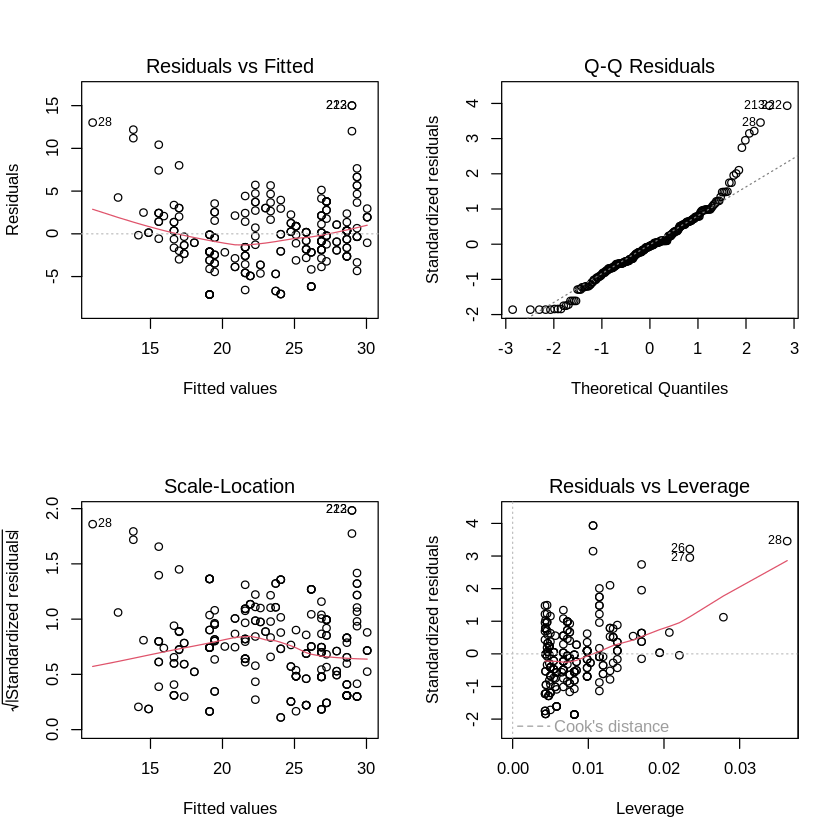

In [23]:
par(mfrow = c(2, 2))

plot(model)

# residuals vs fitted is diagnostic plot for linearity
# q-q residuals is diagnostic plot for normality of residuals
# scale-location is diagnostic plot for constant variance (homoscedasticity)

 Briefly explain whether each assumption appears to be satisfied for the mpg model.

**Linearity:** The line should be straight as residuals should be randomly scattered without pattern, hwowever since there the line is slightly curved, linearity is not satisfied.

**Normality of residuals:** The points mainly follow the diagonal line, meaning that it satisfies normality of residuals with some deviation.

**Constant variance (homoscedasticity):** The red line should be flat, however as there is some curve, it means that there is a violation in constant variance.

# **Part 4: Transformation or Model Critique **
(3 pts) If any assumptions are violated in the mpg model, apply an appropriate transformation (e.g., log transformation of displ or hwy) OR justify why no transformation is necessary.

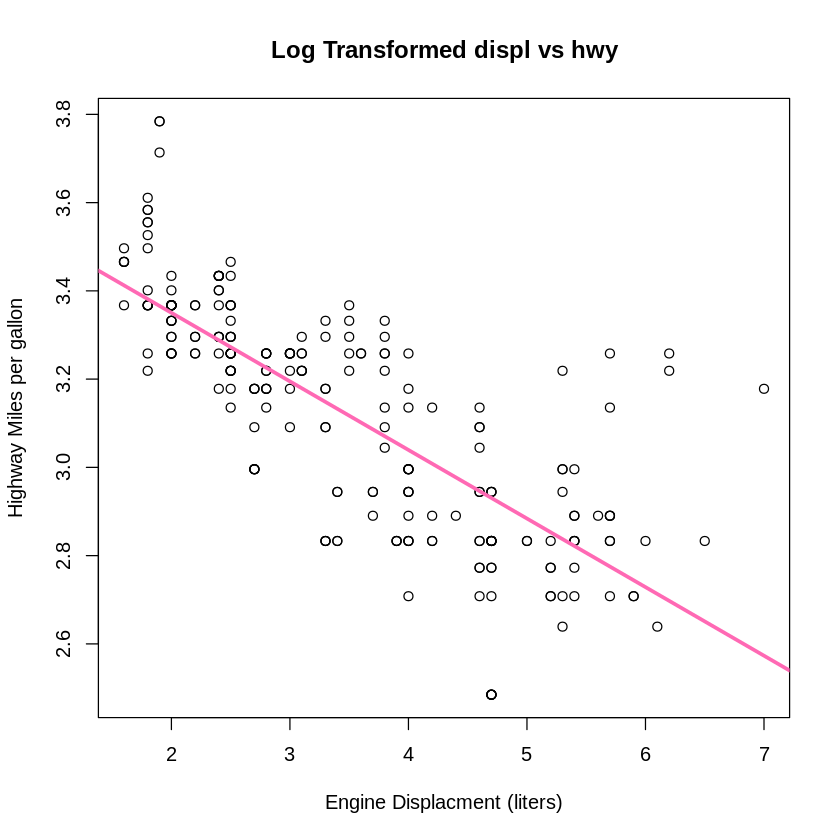

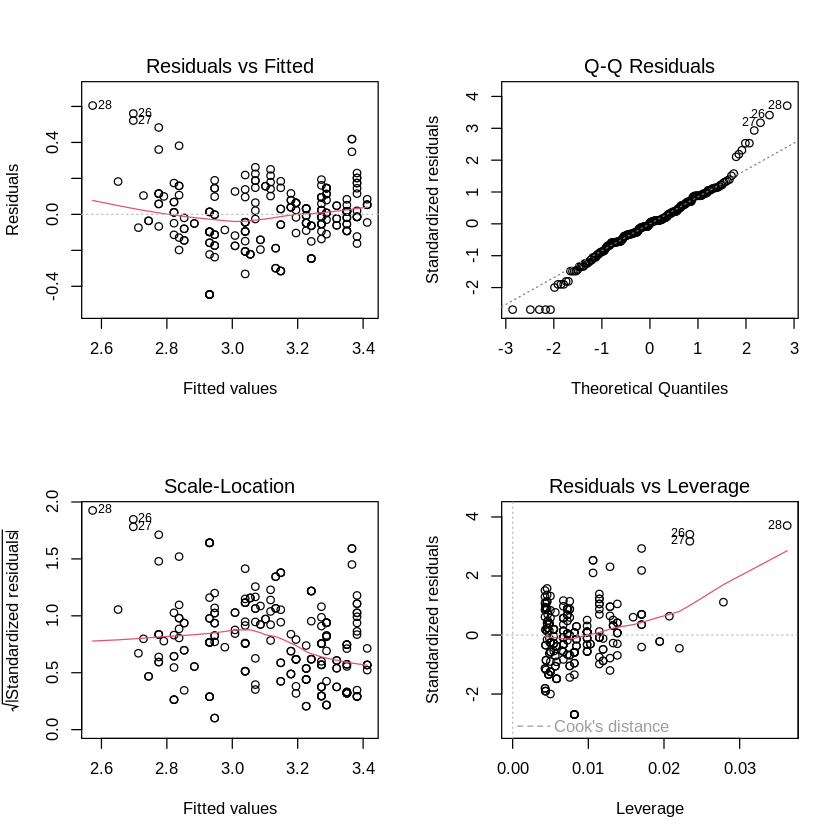

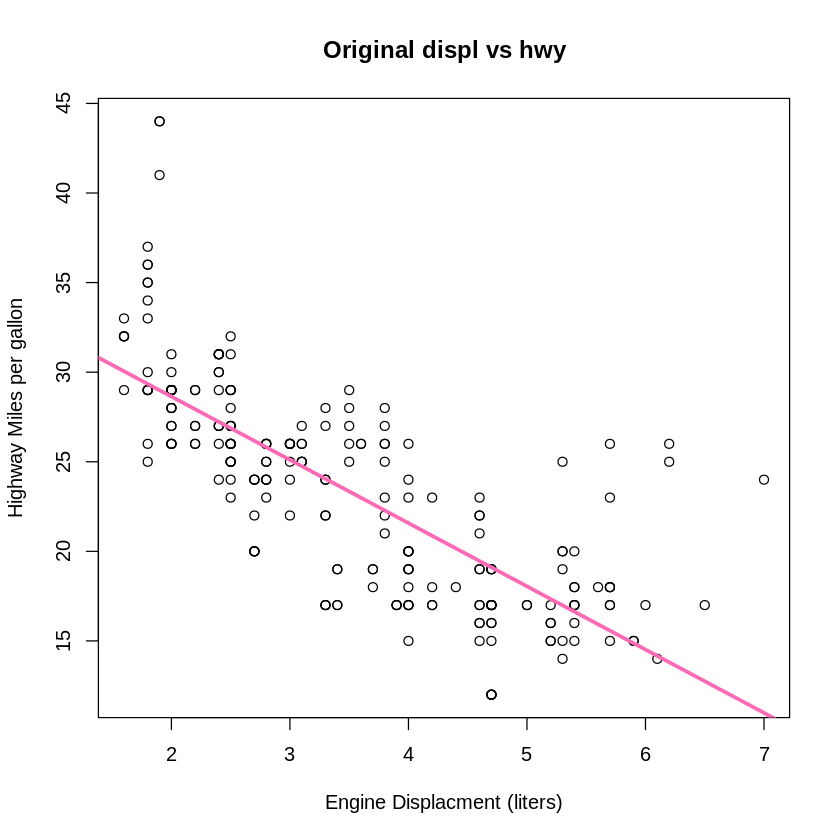

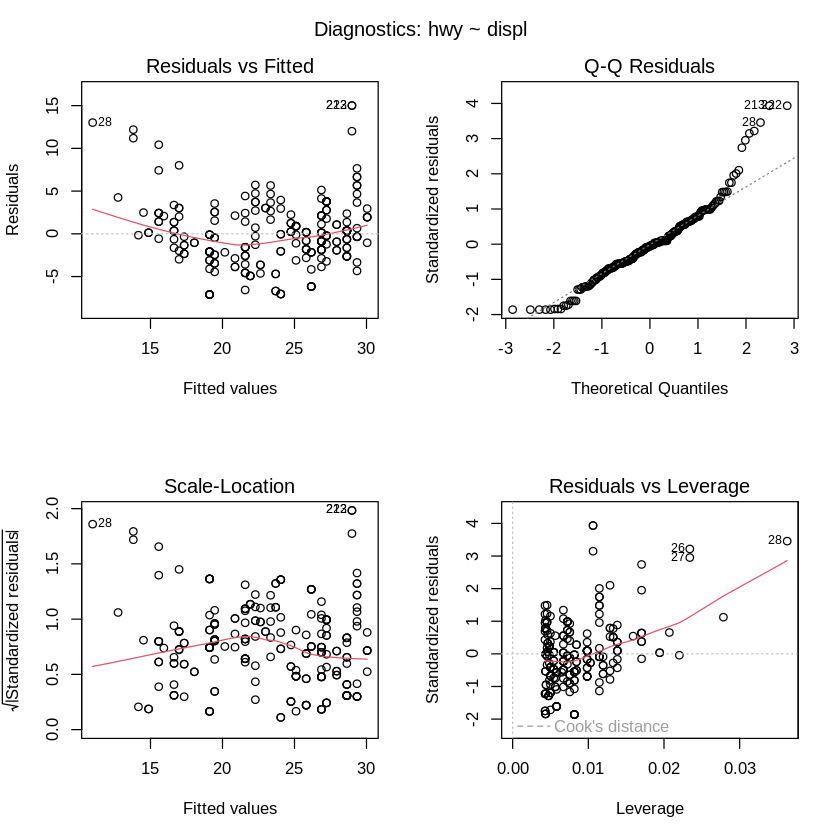

In [54]:
# If any assumptions are violated in the mpg model, apply an appropriate transformation (e.g., log transformation of displ or hwy) OR justify why no transformation is necessary
plot(log(hwy) ~ displ, data = mpg,
     main = "Log Transformed displ vs hwy",
     xlab = "Engine Displacment (liters)",
     ylab = "Highway Miles per gallon")

model_loghwy <- lm(log(hwy) ~ displ, data = mpg)
abline(model_loghwy, col = "hot pink", lwd = 3)

par(mfrow = c(2, 2))
plot(model_loghwy)
mtext("Transformed: (log(hwy) ~ displ", side = 3, line = -2, outer = TRUE)
par(mfrow = c(1, 1))

# Compare it with the original mpg model

plot(hwy ~ displ, data = mpg,
     main = "Original displ vs hwy",
     xlab = "Engine Displacment (liters)",
     ylab = "Highway Miles per gallon")

model <- lm(hwy ~ displ, data = mpg)
abline(model, col = "hot pink", lwd = 3)
par(mfrow = c(2, 2))

plot(model)
mtext("Original: hwy ~ displ", side = 3, line = -2, outer = TRUE)

(2 pts) Refit the model if transformed and briefly compare it with the original mpg model, or discuss the limitations of the simple linear model for this dataset.  

Even after using log transformation, linearity and homoscedasticity are still not satisfied, meaning that for the mpg dataset, simple linear model is not appropriate to use.

# **Part 5: Reflection**
In 3–5 sentences, reflect on your experience using the mpg dataset:

What you learned about the relationship between engine displacement and fuel efficiency

Why checking model assumptions is important when working with real-world data


- Fuel efficiency decreases when engine displacement increases, as larger engines get fewer miles per gallon. This is also shown in the simple linear model which has a slope of slope of -3.531, meaning highway MPG decreases by   3.531 for every liter of engine displacement. However before using simple linear model, it is important to check model assumptions, as real-world data often violate these assumptions, meaning this may lead to inaccurate predictions.